<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [5]:
diabetes = load_diabetes()

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [18]:
X = diabetes.data


print("Details of X_______")
# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# output
y = diabetes.target
print("Details of y_______")
print("First 10 values in y: ", y[:10])
print("# of observations in y: ", (len(y)))
print("shape of y: ", (y.shape))

Details of X_______
X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
Details of y_______
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]
# of observations in y:  442
shape of y:  (442,)


In [19]:
# Save number of columns as n_cols
n_cols = X.shape[1]

In [21]:
#Split into train and test data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [22]:
model=Sequential()

In [23]:
# Add the first hidden layer (n_cols defined above)
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [26]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [27]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [28]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 0)

CPU times: total: 11min 27s
Wall time: 1min 52s


### Create predictions

In [29]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


### Evaluate the model

In [32]:
#test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])
print("score: ", score)
print("RMSE: ", score[0] ** (1/2))
print("y mean: ", y.mean())
print("y standard deviation: ", y.std())
print("y min: ", y.min())
print("y max: ", y.max())

5/5 [==============================] - 0s 2ms/step - loss: 3296.1736 - mse: 3296.1736

Test loss: 3296.173584
score:  [3296.173583984375, 3296.173583984375]
RMSE:  57.41231212888378
y mean:  152.13348416289594
y standard deviation:  77.00574586945044
y min:  25.0
y max:  346.0


### Visualisation of cost

In [33]:
history.history

{'loss': [28737.1640625,
  28702.904296875,
  28659.712890625,
  28602.7421875,
  28525.74609375,
  28426.015625,
  28298.1953125,
  28142.626953125,
  27952.376953125,
  27726.041015625,
  27459.193359375,
  27153.59765625,
  26800.62109375,
  26399.421875,
  25960.806640625,
  25488.94140625,
  24963.53515625,
  24377.82421875,
  23743.068359375,
  23074.40234375,
  22374.6796875,
  21598.224609375,
  20807.056640625,
  20016.62890625,
  19176.58203125,
  18327.142578125,
  17451.904296875,
  16555.2421875,
  15654.4580078125,
  14786.5634765625,
  13897.9091796875,
  13043.93359375,
  12220.4228515625,
  11387.1669921875,
  10601.470703125,
  9863.98828125,
  9192.7802734375,
  8557.576171875,
  8027.91162109375,
  7548.68798828125,
  7118.7080078125,
  6707.65869140625,
  6327.59814453125,
  6014.07275390625,
  5750.39892578125,
  5526.779296875,
  5320.22802734375,
  5132.29931640625,
  4985.59521484375,
  4871.32177734375,
  4752.73681640625,
  4652.939453125,
  4574.58544921875,

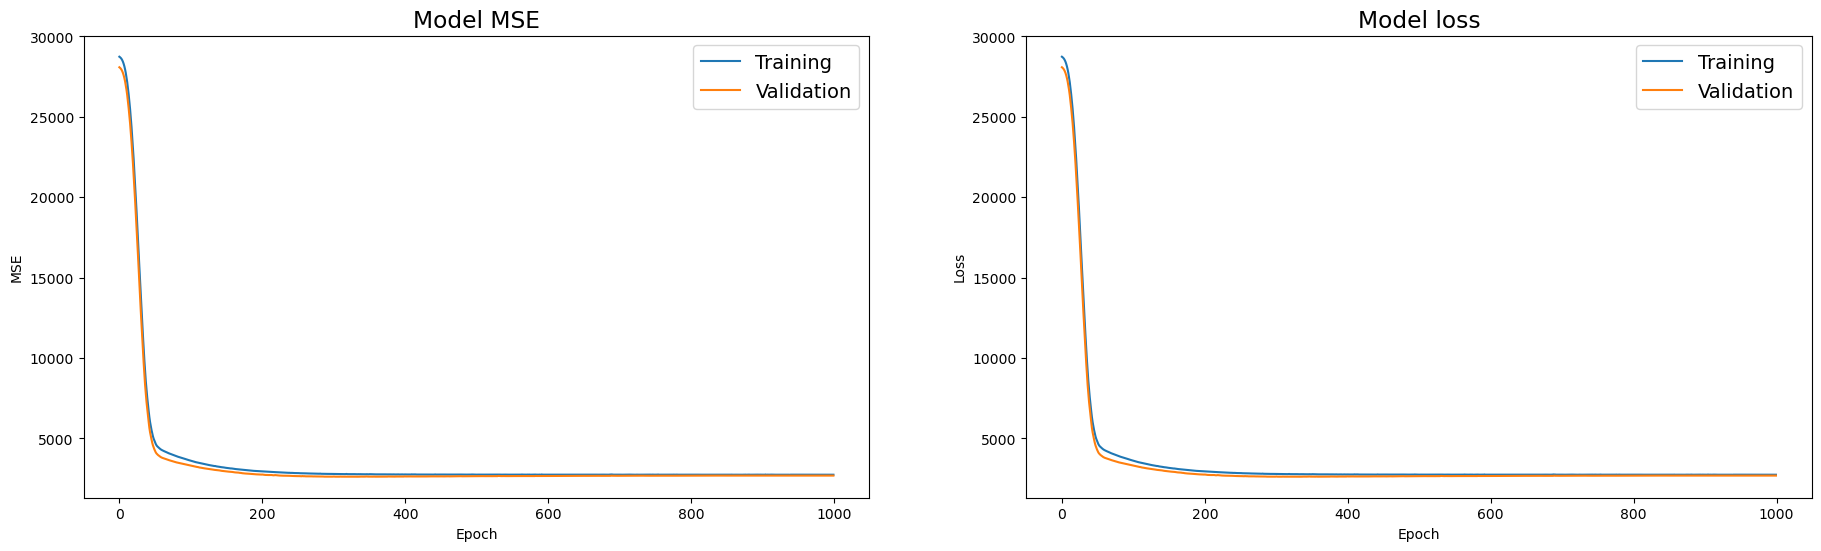

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [35]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

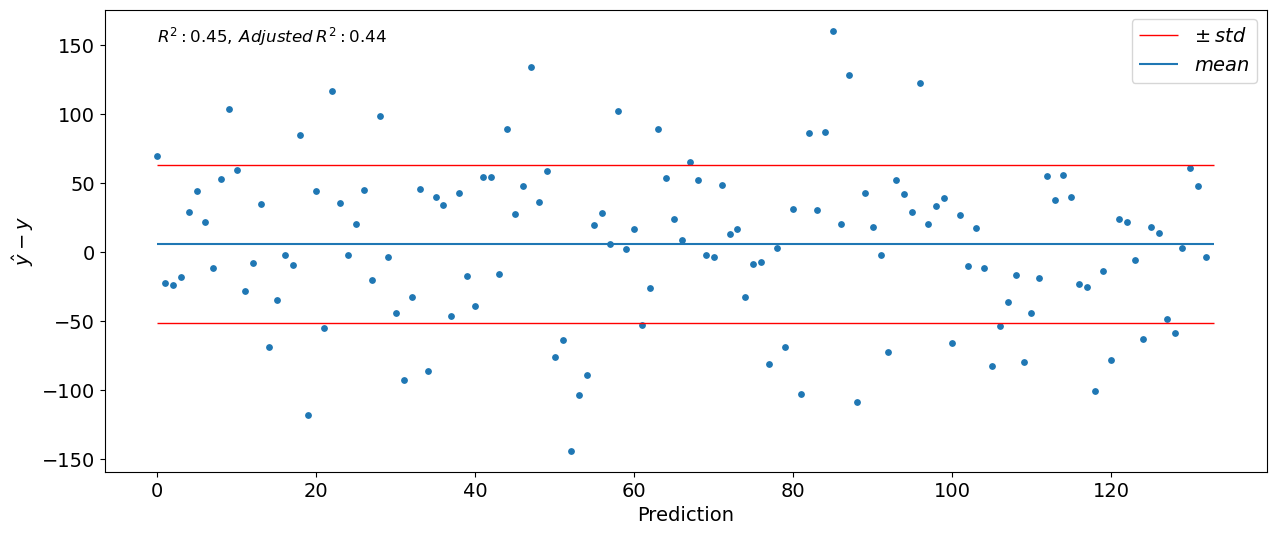

In [36]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



